# Classification
---
Author: Anatoliy Durkin

Updated: 28.02.2025

В данном ноутбуке библиотеки будут импортироваться по мере необходимости, что продиктовано удобством для процесса обучения. Однако напоминаю, что лучше, если все импорты у вас находятся в одной ячейке!

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Данные

Набор данных по диагностике диабета.

Этот набор данных содержит 9538 медицинских записей , связанных с диагностикой диабета и факторами риска. Он включает различные параметры здоровья, привычки образа жизни и генетические предрасположенности, которые способствуют риску диабета. Данные структурированы с реалистичными распределениями, что делает их ценными для медицинских исследований, статистического анализа и приложений машинного обучения.

---
Описание столбцов:

- Age: The age of the individual (18-90 years).
- Pregnancies: Number of times the patient has been pregnant.
- BMI (Body Mass Index): A measure of body fat based on height and weight (kg/m²).
- Glucose: Blood glucose concentration (mg/dL), a key diabetes indicator.
- BloodPressure: Systolic blood pressure (mmHg), higher levels may indicate hypertension.
- HbA1c: Hemoglobin A1c level (%), representing average blood sugar over months.
- LDL (Low-Density Lipoprotein): "Bad" cholesterol level (mg/dL).
- HDL (High-Density Lipoprotein): "Good" cholesterol level (mg/dL).
- Triglycerides: Fat levels in the blood (mg/dL), high values increase diabetes risk.
- WaistCircumference: Waist measurement (cm), an indicator of central obesity.
- HipCircumference: Hip measurement (cm), used to calculate WHR.
- WHR (Waist-to-Hip Ratio): Waist circumference divided by hip circumference.
- FamilyHistory: Indicates if the individual has a family history of diabetes (1 = Yes, 0 = No).
- DietType: Dietary habits (0 = Unbalanced, 1 = Balanced, 2 = Vegan/Vegetarian).
- Hypertension: Presence of high blood pressure (1 = Yes, 0 = No).
- MedicationUse: Indicates if the individual is taking medication (1 = Yes, 0 = No).
- Outcome: Diabetes diagnosis result (1 = Diabetes, 0 = No Diabetes).

---
Этот набор данных полезен для изучения взаимосвязей между образом жизни, генетическими факторами и риском развития диабета, предоставляя ценную информацию для прогностического моделирования и аналитики здоровья.

In [111]:
df = pd.read_csv('diabetes_dataset.csv')

Ознакомьтесь с данными, проверьте их на наличие ошибок, пропусков и прочих вещей, которые могут осложнить дальнейшую работу. Ознакомьтесь с типами данных в таблице.

In [112]:
print("Первые 5 строк датасета:")
print(df.head())

print("\nИнформация о датасете:")
print(df.info())

print("\nСтатистика данных:")
print(df.describe())

print("\nПроверка пропусков:")
print(df.isnull().sum())

print("\nПроверка дубликатов:")
print(f"Найдено {df.duplicated().sum()} дубликатов")

print("\nРаспределение целевой переменной (Outcome):")
print(df['Outcome'].value_counts())

Первые 5 строк датасета:
   Age  Pregnancies    BMI  Glucose  BloodPressure  HbA1c    LDL   HDL  \
0   69            5  28.39    130.1           77.0    5.4  130.4  44.0   
1   32            1  26.49    116.5           72.0    4.5   87.4  54.2   
2   89           13  25.34    101.0           82.0    4.9  112.5  56.8   
3   78           13  29.91    146.0          104.0    5.7   50.7  39.1   
4   38            8  24.56    103.2           74.0    4.7  102.5  29.1   

   Triglycerides  WaistCircumference  HipCircumference   WHR  FamilyHistory  \
0           50.0                90.5             107.9  0.84              0   
1          129.9               113.3              81.4  1.39              0   
2          177.6                84.7             107.2  0.79              0   
3          117.0               108.9             110.0  0.99              0   
4          145.9                84.1              92.8  0.91              0   

   DietType  Hypertension  MedicationUse  Outcome  
0  

Необходимо ли выполнить какую-то предобработку? Сделайте всё, что считаете нужным, всё может сказаться в дальнейшем при построении моделей.

<Figure size 1200x600 with 0 Axes>

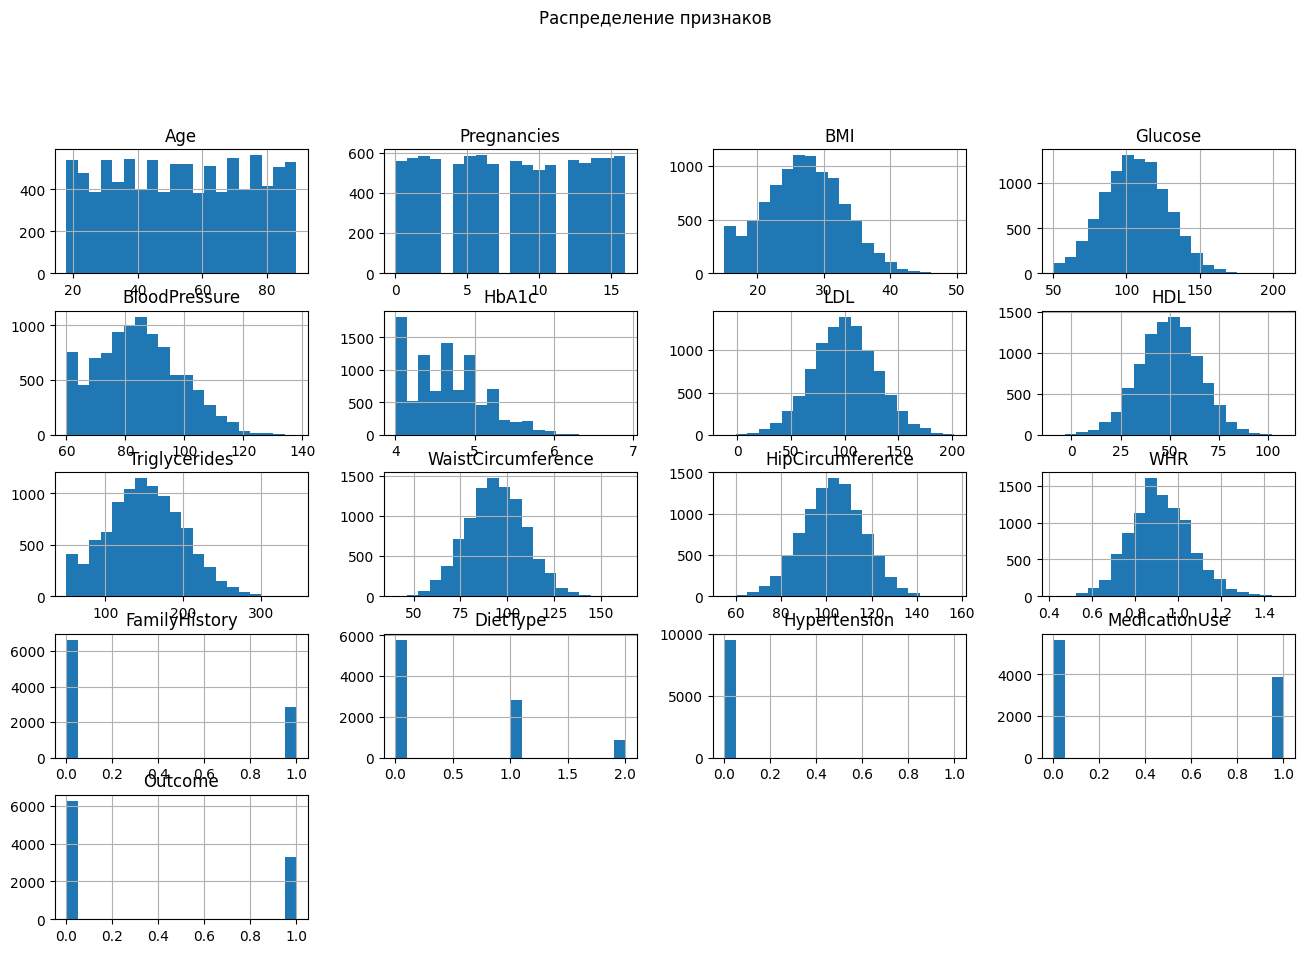

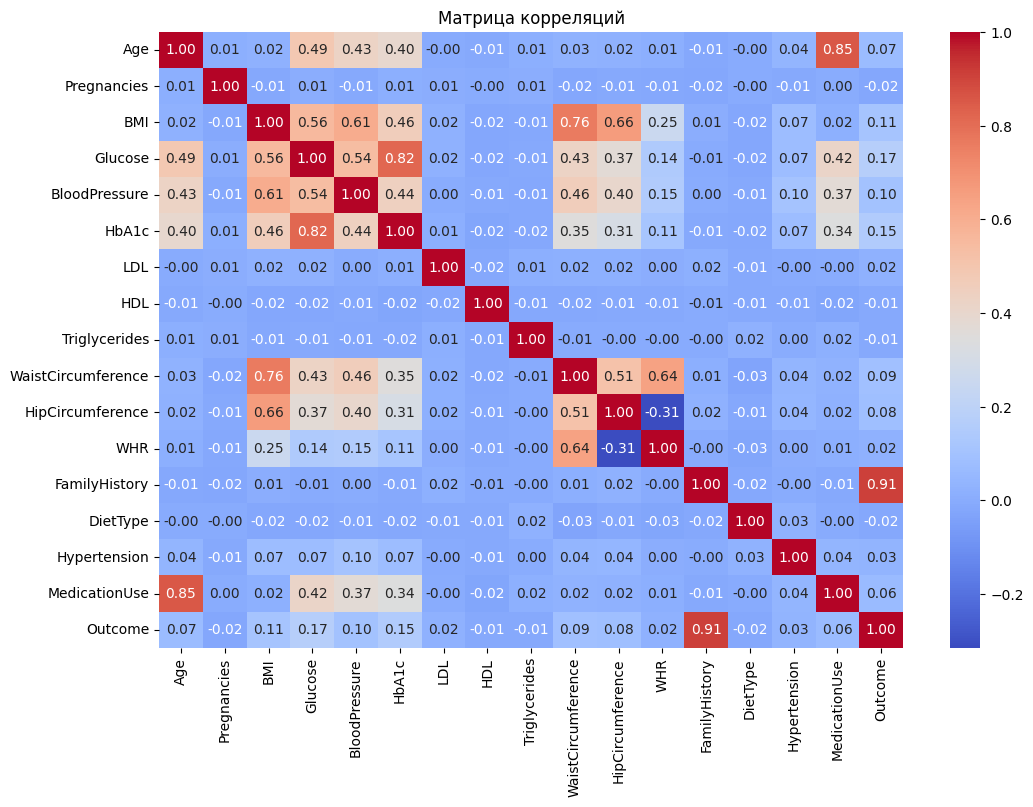

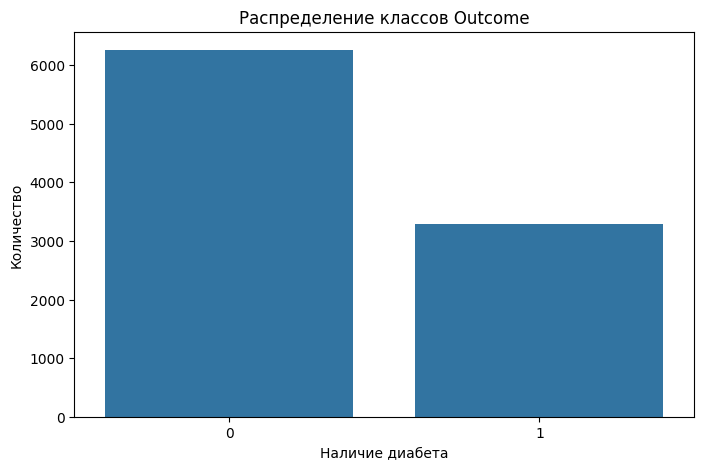

In [113]:
# Визуализация распределения признаков
plt.figure(figsize=(12, 6))
df.hist(bins=20, figsize=(16, 10))
plt.suptitle('Распределение признаков', y=1.02)
plt.show()

# Анализ корреляций
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций')
plt.show()

# Предобработка данных
# Заполнение пропусков (пример для Glucose)
if df['Glucose'].isnull().sum() > 0:
    df['Glucose'].fillna(df['Glucose'].median(), inplace=True)

# Преобразование категориальных признаков
df = pd.get_dummies(df, columns=['DietType'], drop_first=True)

# Нормализация числовых признаков
numeric_cols = ['Age', 'BMI', 'Glucose', 'BloodPressure', 'HbA1c', 'LDL', 'HDL', 
               'Triglycerides', 'WaistCircumference', 'HipCircumference']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Визуализация дисбаланса классов
plt.figure(figsize=(8, 5))
sns.countplot(x='Outcome', data=df)
plt.title('Распределение классов Outcome')
plt.xlabel('Наличие диабета')
plt.ylabel('Количество')
plt.show()

# Разделение данных
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)



## Выборка данных

В разделении данных помогает замечательна функция `train_test_split` из библиотеки `scikit-learn`. Именно этой библиотекой мы в основном будем пользоваться в дальнейшем. Напоминаю, если у вас нет библиотеки, её легко установить через `pip` даже из ячейки ноутбука.

In [114]:
# Если нужно установить библиотеку:

# !pip install scikit-learn

In [115]:
from sklearn.model_selection import train_test_split

Теперь можем использовать эту функцию для разделения данных. Функция принимает на вход два набора данных (пожаем один с признаками, другой с целевым признаком), аргумент `test_size` позволяет указать долю данных, которую нужно отделить в тестовый набор. Функция автоматически случаным образом разделит датасеты в указанном соотношении, при этом в тестовую часть попадут соответствующие строки из обоих наборов данных.

Также указывается аргумент `random_state`, он не обязателен, но рекомендуется его указывать. Это фиксация сида для генерации рандомных чисел. Таким образом, указывая одно и то же число в этом аргументе, вы получите одно и то же разбиение на выборки. Этот аргумент позволяет сделать ваши манипуляции воспроизводимыми.

Функция возвращает четыре датасета, по два для каждого из переданных, при этом в каждой паре сначала идет обучающая выборка, затем тестовая. Обратите внимание, как мы сохраняем резульатат. Здесь "x" - признаки, "y" - целевой признак.

In [116]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['Outcome'], axis=1), df['Outcome'], test_size=0.25, random_state=42)


Сравните размеры датасетов, убедитесь, что в тестовой выборке нужное нам количество данных. Сравните индексы датасетов с признаками и целевым признаком, чтобы убедиться, что они совпадают.

In [117]:
print("\nРазмеры выборок:")
print(f"Обучающая: {X_train.shape}, Тестовая: {X_test.shape}")
print(f"Соотношение классов в обучающей выборке:\n{y_train.value_counts(normalize=True)}")
print(f"Соотношение классов в тестовой выборке:\n{y_test.value_counts(normalize=True)}")


Размеры выборок:
Обучающая: (7153, 17), Тестовая: (2385, 17)
Соотношение классов в обучающей выборке:
Outcome
0    0.653432
1    0.346568
Name: proportion, dtype: float64
Соотношение классов в тестовой выборке:
Outcome
0    0.663312
1    0.336688
Name: proportion, dtype: float64


## kNN

In [118]:
from sklearn.neighbors import KNeighborsClassifier

In [119]:
knn = KNeighborsClassifier(n_neighbors=10)

In [120]:
knn_model = knn.fit(x_train, y_train)

In [121]:
knn_predictions = knn.predict(x_test.values)
knn_predictions

c:\Users\Admin\Desktop\учеба\2 курс\Machine_Learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 0, ..., 1, 0, 0], shape=(2385,))

In [122]:
from sklearn.metrics import accuracy_score

In [123]:
accuracy = accuracy_score(y_test, knn_predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8020964360587002


Матрица ошибок

---
|           | Predicted: 0 | Predicted:1 |
|-----------|:------------:|:-----------:|
| Actual: 0 | TN           | FP          |
| Actual: 1 | FN           | TP          |

In [124]:
from sklearn.metrics import confusion_matrix

In [125]:
confusion_matrix(y_test, knn_predictions)

array([[1576,    6],
       [ 466,  337]])

Матрица ошибок хороша, но можно ли сделать её легче для восприятия? Попробуйте сделать тепловую карту.

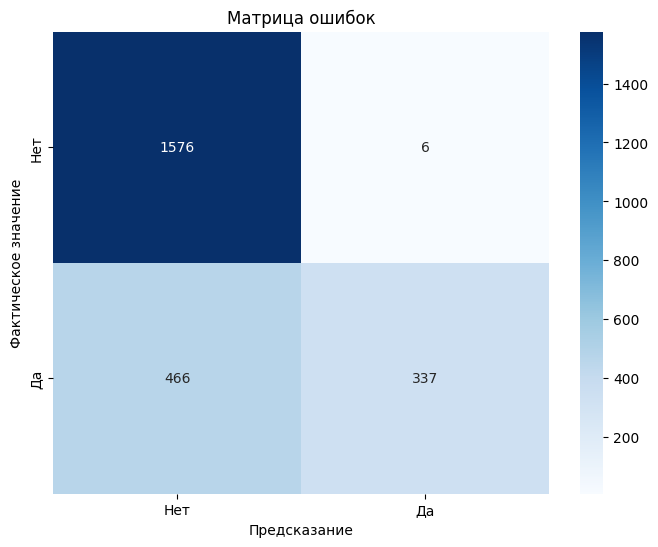

In [126]:
# Визуализация матрицы ошибок
cm = confusion_matrix(y_test, knn_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Нет', 'Да'], yticklabels=['Нет', 'Да'])
plt.title('Матрица ошибок')
plt.xlabel('Предсказание')
plt.ylabel('Фактическое значение')
plt.show()

Продолжим изучение метрик. Что мы можем получить ещё из матрицы ошибок? Два важных показателя.

---

$Precision = \frac{TP}{TP+FP}$

Точность определяет, как много отрицательных ответов нашла модель, пока искала положительные. Чем больше отрицательных, тем ниже точность.

---

$Recall = \frac{TP}{TP+FN}$

Полнота выявляет, какую долю положительных среди всех ответов выделила модель. Обычно они на вес золота, и важно понимать, как хорошо модель их находит.

In [127]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [128]:
precision = precision_score(y_test, knn_predictions)
recall = recall_score(y_test, knn_predictions)
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Precision: 0.9825072886297376
Recall: 0.41967621419676215


F1-мера - среднее гармоническое точности и полноты.

In [129]:
f1 = f1_score(y_test, knn_predictions)
print(f'F1: {f1}')

F1: 0.5881326352530541


C:\Users\Admin\AppData\Local\Temp\ipykernel_7948\3276282028.py:9: RuntimeWarning: invalid value encountered in divide
  z = 2*X*Y/(X+Y)


Text(0.5, 1.0, 'F1-score')

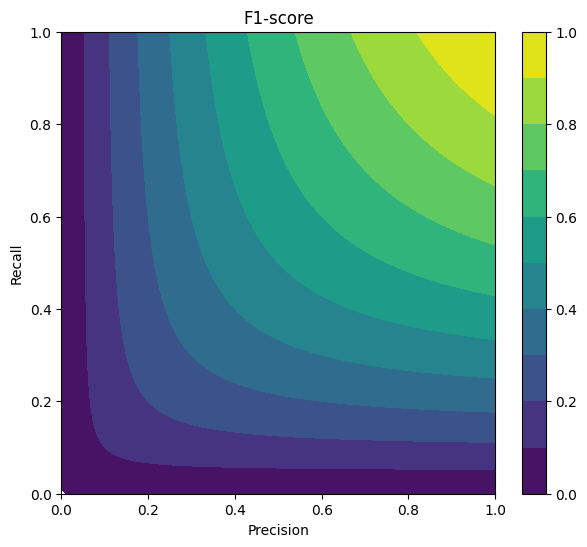

In [130]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker

x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)

X, Y = np.meshgrid(x, y)
z = 2*X*Y/(X+Y)

fig, ax = plt.subplots(figsize=(7,6))
cs = ax.contourf(X, Y, z, locator=ticker.LinearLocator())
cbar = fig.colorbar(cs)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('F1-score')

## Нормализация

In [131]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [132]:
scaler = StandardScaler()

In [133]:
scaler.fit_transform(x_train)

array([[-0.88697085,  0.4037797 ,  1.12362248, ..., -0.81954393,
        -0.65729144, -0.30969227],
       [-0.93494042,  0.80894716,  0.75502011, ..., -0.81954393,
         1.52139515, -0.30969227],
       [ 0.02445086, -0.81172266, -0.4150388 , ..., -0.81954393,
         1.52139515, -0.30969227],
       ...,
       [ 0.60008563,  1.61928207, -1.95370008, ...,  1.22019084,
         1.52139515, -0.30969227],
       [ 0.98384215, -1.01430639, -0.89185471, ...,  1.22019084,
        -0.65729144,  3.22901186],
       [ 0.69602476, -0.20397148, -0.98992323, ...,  1.22019084,
        -0.65729144, -0.30969227]], shape=(7153, 17))

## Дисбаланс

Посмотрим на объемы данных в наших классах. Напишите код. чтобы сравнить их размеры:

Распределение классов:
Outcome
0    6256
1    3282
Name: count, dtype: int64


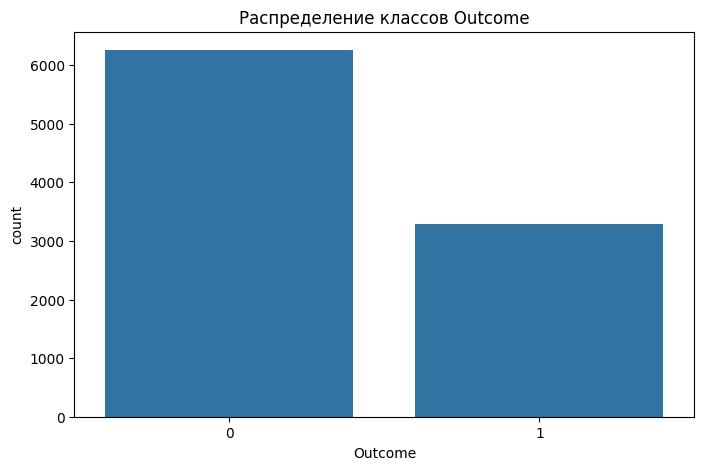

In [134]:
print("Распределение классов:")
print(df['Outcome'].value_counts())

plt.figure(figsize=(8, 5))
sns.countplot(x='Outcome', data=df)
plt.title('Распределение классов Outcome')
plt.show()

# Преобразование в numpy arrays
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

# Исправление ошибки с feature_names
feature_names = X.tolist()  # Сохраняем названия признаков до конвертации в numpy array



# Разделение данных с сохранением имен признаков
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)



Upsampling and Downsampling

Upsampling: Увеличение меньшего класса до размера большего

Downsampling: Уменьшение большего класса до размера меньшего

In [135]:
# Upsampling
from sklearn.utils import resample

# Разделение классов
majority_class = X_train[y_train == 0]
minority_class = X_train[y_train == 1]

# Увеличение меньшего класса
minority_upsampled = resample(minority_class,
                             replace=True,
                             n_samples=len(majority_class),
                             random_state=42)

X_train_upsampled = np.concatenate([majority_class, minority_upsampled])
y_train_upsampled = np.concatenate([np.zeros(len(majority_class)), np.ones(len(minority_upsampled))])

# Downsampling
majority_downsampled = resample(majority_class,
                               replace=False,
                               n_samples=len(minority_class),
                               random_state=42)

X_train_downsampled = np.concatenate([majority_downsampled, minority_class])
y_train_downsampled = np.concatenate([np.zeros(len(majority_downsampled)), np.ones(len(minority_class))])



Синтез

SMOTE: Синтетическое создание примеров меньшего класса

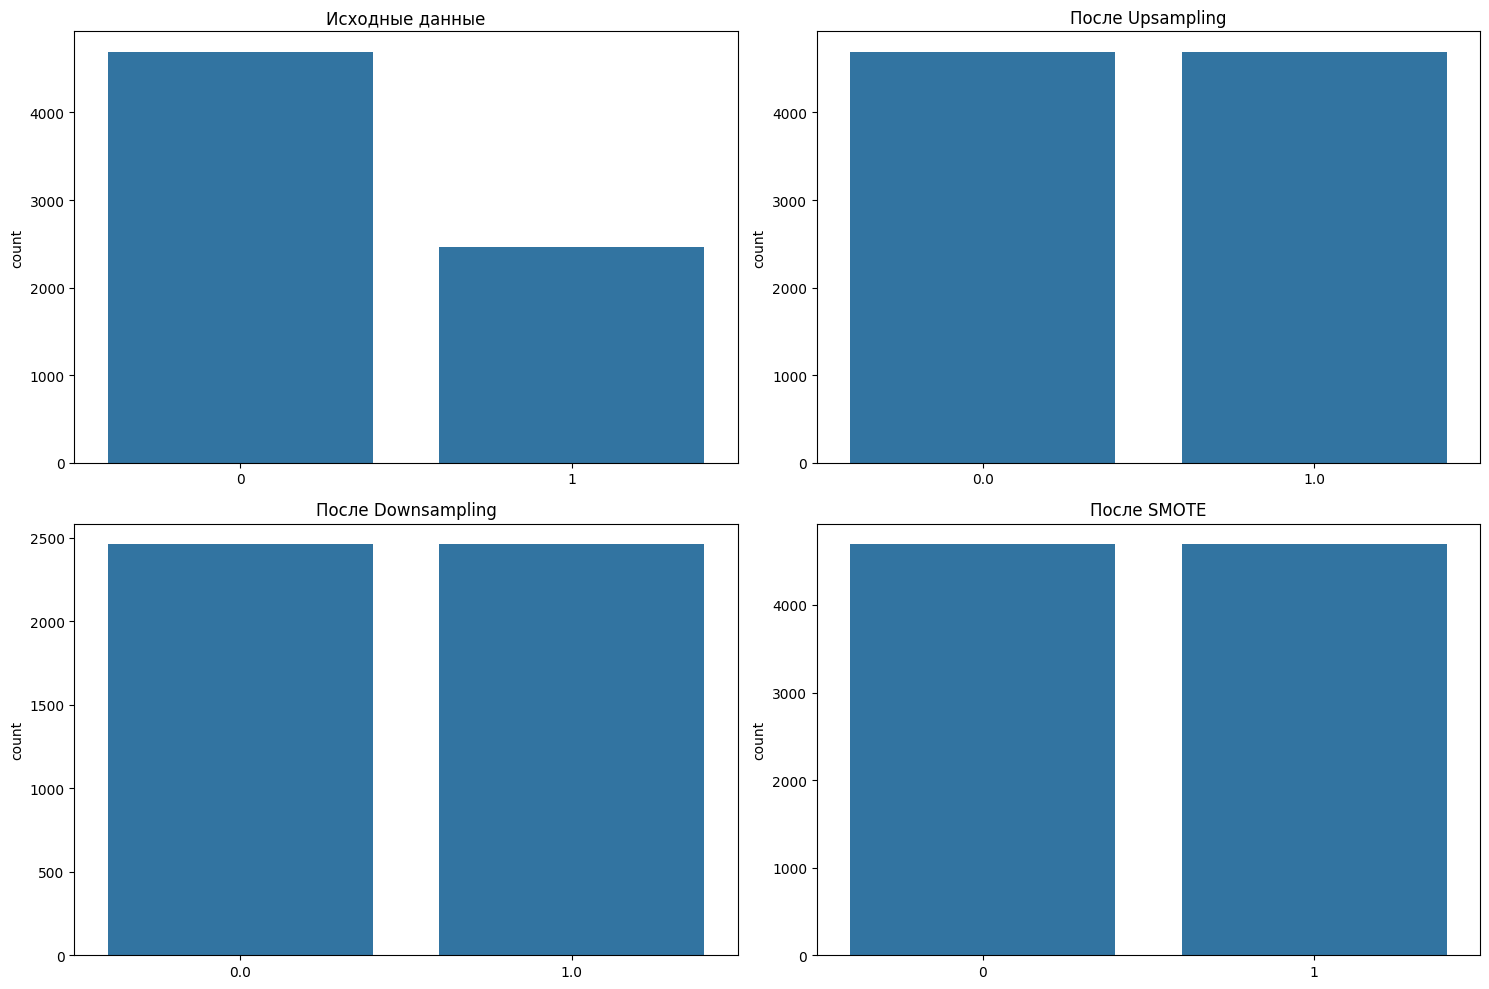

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Визуализация балансировки
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(x=y_train, ax=axes[0,0]).set_title('Исходные данные')
sns.countplot(x=y_train_upsampled, ax=axes[0,1]).set_title('После Upsampling')
sns.countplot(x=y_train_downsampled, ax=axes[1,0]).set_title('После Downsampling')
sns.countplot(x=y_train_smote, ax=axes[1,1]).set_title('После SMOTE')

plt.tight_layout()
plt.show()



## Дерево решений

In [137]:
from sklearn.tree import DecisionTreeClassifier

In [138]:
clf = DecisionTreeClassifier(random_state=42)

In [139]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [140]:
pred = clf.predict(x_test)

In [141]:
accuracy_score(y_test, pred)

0.5463312368972746

In [142]:
from sklearn import tree

[Text(0.536499244183829, 0.9888888888888889, 'x[7] <= -0.689\ngini = 0.451\nsamples = 7153\nvalue = [4692, 2461]'),
 Text(0.15325897746680198, 0.9666666666666667, 'x[10] <= -2.021\ngini = 0.468\nsamples = 1743\nvalue = [1091, 652]'),
 Text(0.34487911082531547, 0.9777777777777779, 'True  '),
 Text(0.09889638998552033, 0.9444444444444444, 'x[4] <= -1.273\ngini = 0.283\nsamples = 41\nvalue = [34.0, 7.0]'),
 Text(0.09652024058512679, 0.9222222222222223, 'x[7] <= -1.329\ngini = 0.49\nsamples = 14\nvalue = [8, 6]'),
 Text(0.0957281907849956, 0.9, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.09731229038525797, 0.9, 'x[0] <= -1.087\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.09652024058512679, 0.8777777777777778, 'x[9] <= -1.632\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.0957281907849956, 0.8555555555555555, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.09731229038525797, 0.8555555555555555, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.09810434018538916

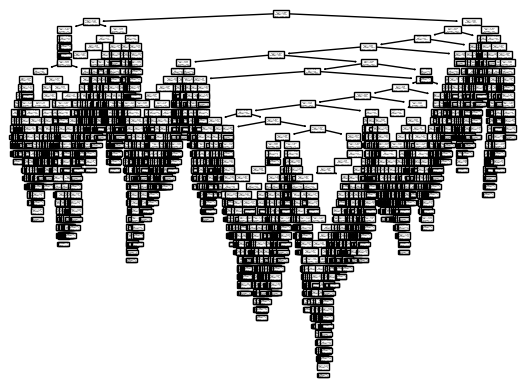

In [143]:
tree.plot_tree(clf)

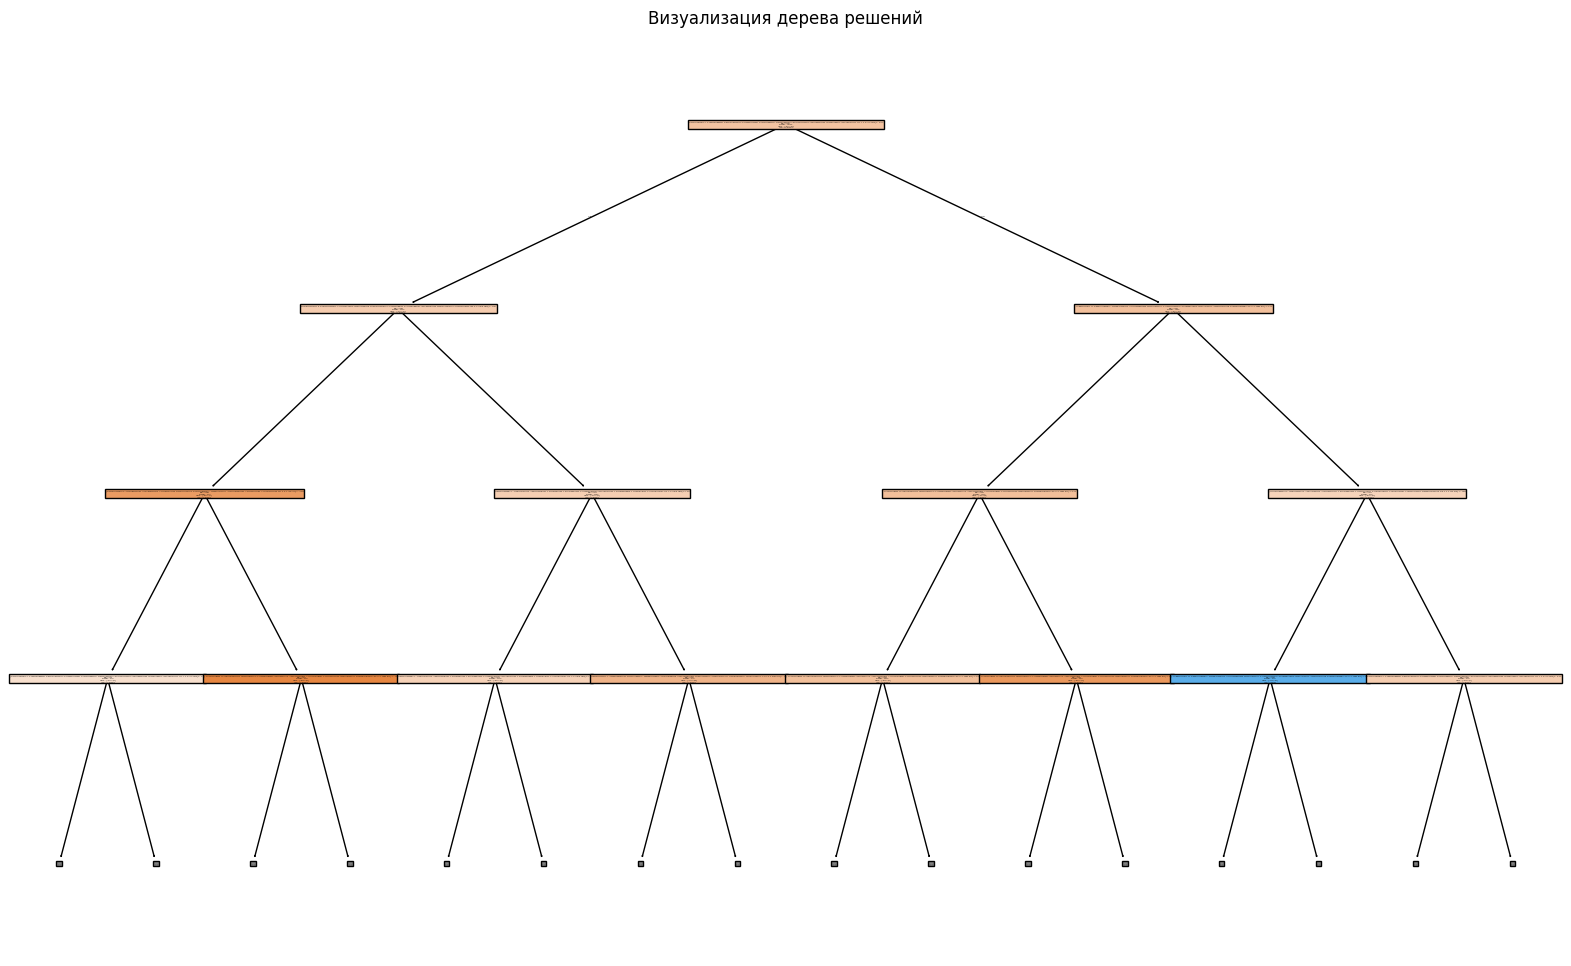

In [144]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 12))
plot_tree(clf, 
          filled=True, 
          feature_names=feature_names,  # Используем сохраненные названия признаков
          class_names=['No Diabetes', 'Diabetes'], 
          proportion=True, 
          max_depth=3)
plt.title("Визуализация дерева решений")
plt.show()

## Кросс-валидация

Используем стратифицированную версию для сохранения соотношения классов

Оцениваем с помощью F1-score как более информативной метрики при дисбалансе

Выводим среднее значение и стандартное отклонение

In [145]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

# Создаем стратегию кросс-валидации
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Создаем модель
knn = KNeighborsClassifier(n_neighbors=10)

# Вычисляем F1-score с кросс-валидацией
f1_scorer = make_scorer(f1_score)
cv_scores = cross_val_score(knn, X_train, y_train, cv=cv, scoring=f1_scorer)

print("\nРезультаты кросс-валидации:")
print(f"F1-score: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")




Результаты кросс-валидации:
F1-score: 0.57 ± 0.02
